In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import GridSearchCV

import time

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('data/data.csv', sep=',')

In [3]:
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.drop(df.columns[-1], axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
# label
label = 'diagnosis'
df[label] = df[label].map({'M':1, 'B':0})

In [10]:
df[label].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Data preprocessing

In [11]:
# stratified train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(label, axis=1), 
                                                    df.loc[:,label], 
                                                    test_size=0.2, 
                                                    random_state=123,
                                                    stratify=df.loc[:,label])

In [12]:
# normalize data
# X_ = df.drop('y', axis=1)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), 
                 columns=X_train.columns, 
                 index=X_train.index)

X_test = pd.DataFrame(scaler.transform(X_test), 
                 columns=X_test.columns, 
                 index=X_test.index)
# df = X.merge(df.loc[:, 'quality_class'].to_frame(), left_index=True, right_index=True)

In [13]:
train_time_dict = {}
pred_time_dict = {}
accuracy_dict = {}
recall_dict = {}

# Decision Tree

In [14]:
dt = DecisionTreeClassifier()

t_start = time.time()
dt.fit(X_train, y_train)
t_end = time.time()
train_time_dict['Decision Tree'] = round(t_end - t_start, 4)

In [15]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
# print(classification_report(y_pred_dt, y_train))

Text(0, 0.5, 'score')

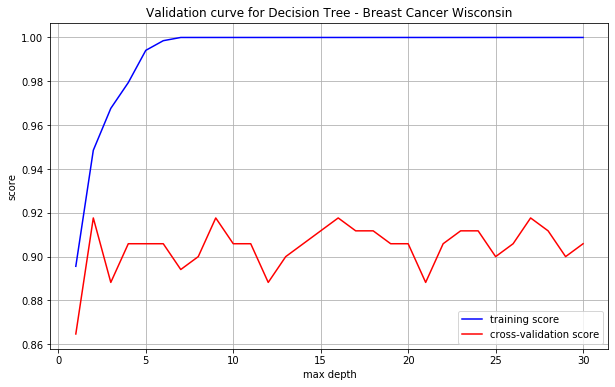

In [17]:
# validation curve
train_scores, validation_scores = validation_curve(dt,
                                                   X_train, 
                                                   y_train, 
                                                   'max_depth',
                                                   range(1, 31),
                                                   scoring='recall',
                                                   cv=5)

# plot
plt.figure(figsize=(10,6))
x_cord = range(1, 31)
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(validation_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Validation curve for Decision Tree - Breast Cancer Wisconsin')
plt.xlabel('max depth')
plt.ylabel('score')

In [18]:
# Hyperparameter tuning. 
param_dict = {
    "max_depth": range(1, 10),
    "min_samples_split":range(1, 20),
}

grid = GridSearchCV(dt, 
                    param_grid=param_dict, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='recall')
grid.fit(X_train, y_train)


Fitting 5 folds for each of 171 candidates, totalling 855 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 855 out of 855 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'mi

In [19]:
print(grid.best_params_)
print(grid.best_score_)
dt = grid.best_estimator_

{'max_depth': 9, 'min_samples_split': 2}
0.9294117647058824


In [20]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(dt,
                                                        X_train, 
                                                        y_train, 
                                                        train_sizes=train_sizes, 
                                                        scoring='recall',
                                                        cv=5)

Text(0, 0.5, 'score')

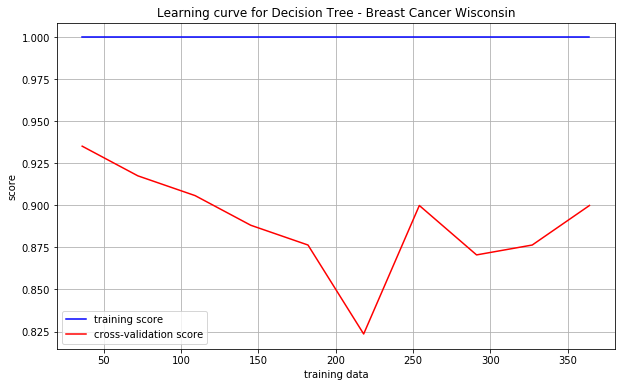

In [22]:
plt.figure(figsize=(10,6))
x_cord = train_sizes
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(test_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Learning curve for Decision Tree - Breast Cancer Wisconsin')
plt.xlabel('training data')
plt.ylabel('score')

In [23]:
model_name = 'Decision Tree'
t_start = time.time()
y_pred_dt = dt.predict(X_test)
t_end = time.time()
pred_time = t_end - t_start

pred_time_dict[model_name] = round(pred_time, 4)
accuracy_dict[model_name] = round(accuracy_score(y_test, y_pred_dt), 4)
recall_dict[model_name] = round(recall_score(y_test, y_pred_dt), 4)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        72
           1       0.85      0.95      0.90        42

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



# Neural Networks

In [24]:
nn = MLPClassifier()

t_start = time.time()
nn.fit(X_train, y_train)
t_end = time.time()
train_time_dict['Neural Network'] = round(t_end - t_start, 4)


In [25]:
nn

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Text(0, 0.5, 'score')

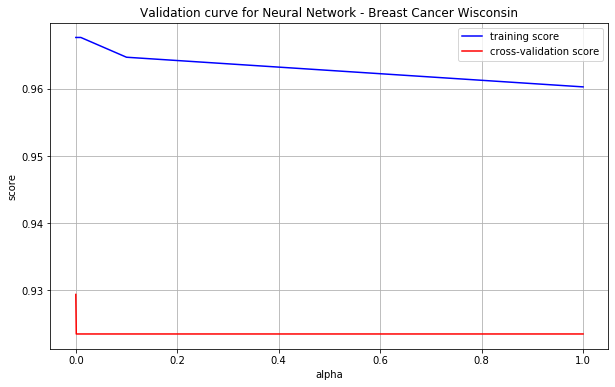

In [26]:
# validation curve
alpha = np.logspace(-4, 0, 5)
train_scores, validation_scores = validation_curve(nn,
                                                   X_train, 
                                                   y_train, 
                                                   'alpha',
                                                   alpha,
                                                   scoring='recall',
                                                   cv=5)

# plot
plt.figure(figsize=(10,6))
x_cord = alpha
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(validation_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Validation curve for Neural Network - Breast Cancer Wisconsin')
plt.xlabel('alpha')
plt.ylabel('score')

In [27]:
# Hyperparameter tuning. 
param_dict = {
    'alpha': np.logspace(-4, 1, 6),
    'hidden_layer_sizes': [(30, 20), (20, 10), (10, 5), (5, 2)],
}

grid = GridSearchCV(nn, 
                    param_grid = param_dict, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='recall'
                   )
grid.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'

In [28]:
print(grid.best_params_)
print(grid.best_score_)
nn = grid.best_estimator_
alpha = grid.best_params_['alpha']
hidden_layer_sizes = grid.best_params_['hidden_layer_sizes']

{'alpha': 0.01, 'hidden_layer_sizes': (30, 20)}
0.9588235294117646


In [29]:
nn

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [30]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(nn,
                                                        X_train, 
                                                        y_train, 
                                                        train_sizes=train_sizes,
                                                        scoring='recall',
                                                        cv=5)

Text(0, 0.5, 'score')

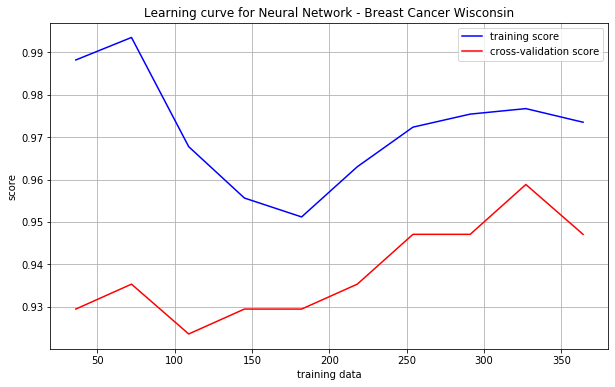

In [31]:
plt.figure(figsize=(10,6))
x_cord = train_sizes
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(test_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Learning curve for Neural Network - Breast Cancer Wisconsin')
plt.xlabel('training data')
plt.ylabel('score')

In [32]:
X_train_tmp, X_val_tmp, y_train_tmp, y_val_tmp = train_test_split(X_train,
                                                                 y_train, 
                                                                 test_size=0.2,
                                                                 random_state=123
                                                                 )

epochs = 500
train_score, val_score = {}, {}

nn_tmp = MLPClassifier(alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, max_iter=1, warm_start=True)

for i in range(epochs):
    nn_tmp.fit(X_train_tmp, y_train_tmp)
    train_score[i] = recall_score(y_train_tmp, nn_tmp.predict(X_train_tmp))
    val_score[i] = recall_score(y_val_tmp, nn_tmp.predict(X_val_tmp))

    

Text(0, 0.5, 'score')

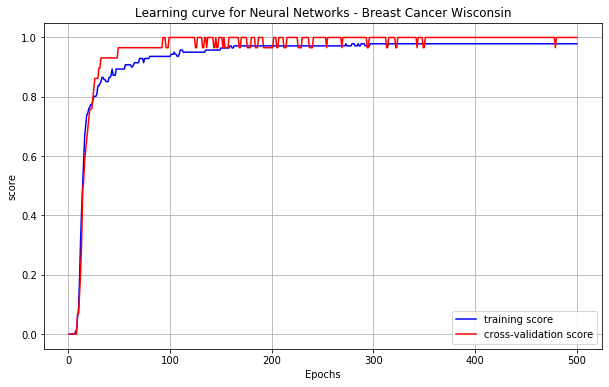

In [33]:
plt.figure(figsize=(10,6))
x_cord = list(range(1, epochs+1))
# y_cord_train = np.mean(train_scores, axis=1)
y_cord_train = pd.DataFrame.from_dict(train_score, orient='index')
# y_cord_val = np.mean(validation_scores, axis=1)
y_cord_val = pd.DataFrame.from_dict(val_score, orient='index')

plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Learning curve for Neural Networks - Breast Cancer Wisconsin')
plt.xlabel('Epochs')
plt.ylabel('score')

In [34]:
model_name = 'Neural Network'
t_start = time.time()
y_pred_nn = nn_tmp.predict(X_test)
t_end = time.time()
pred_time = t_end - t_start

pred_time_dict[model_name] = round(pred_time, 4)
accuracy_dict[model_name] = round(accuracy_score(y_test, y_pred_nn), 4)
recall_dict[model_name] = round(recall_score(y_test, y_pred_nn), 4)
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.93      0.98      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



# Boosting

In [35]:
adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

t_start = time.time()
adb.fit(X_train, y_train)
t_end = time.time()
train_time_dict['AdaBoost'] = round(t_end - t_start, 4)


In [36]:
adb

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

Text(0, 0.5, 'score')

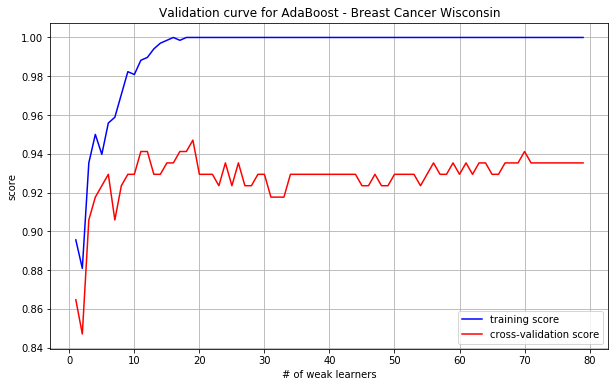

In [37]:
# validation curve
n_estimators = list(range(1, 80))
train_scores, validation_scores = validation_curve(adb,
                                                   X_train, 
                                                   y_train, 
                                                   'n_estimators',
                                                   n_estimators,
                                                   scoring='recall',
                                                   cv=5)

# plot
plt.figure(figsize=(10,6))
x_cord = n_estimators
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(validation_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Validation curve for AdaBoost - Breast Cancer Wisconsin')
plt.xlabel('# of weak learners')
plt.ylabel('score')

In [38]:
# Hyperparameter tuning. 
param_dict = {
    'n_estimators': range(5, 20),
    'learning_rate': np.logspace(-5,1,7)
}

grid = GridSearchCV(adb, 
                  param_grid = param_dict, 
                  cv=5, 
                  verbose=1, 
                  n_jobs=-1,
                  scoring='recall')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=1,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
    

In [39]:
print(grid.best_params_)
print(grid.best_score_)
adb = grid.best_estimator_

{'learning_rate': 1.0, 'n_estimators': 19}
0.9470588235294117


In [40]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(adb,
                                                       X_train, 
                                                       y_train, 
                                                       train_sizes=train_sizes, 
                                                       scoring='recall',
                                                       cv=5)

Text(0, 0.5, 'score')

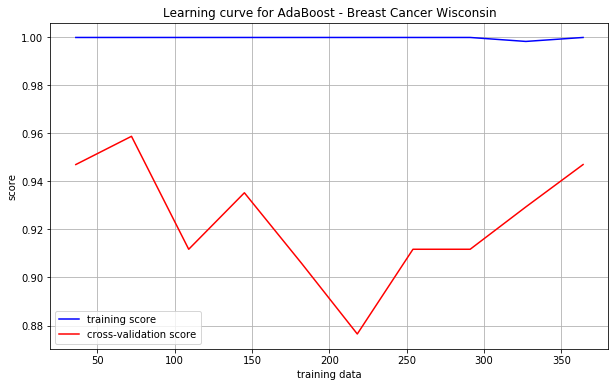

In [41]:
plt.figure(figsize=(10,6))
x_cord = train_sizes
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(test_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Learning curve for AdaBoost - Breast Cancer Wisconsin')
plt.xlabel('training data')
plt.ylabel('score')

In [42]:
model_name = 'AdaBoost'
t_start = time.time()
y_pred_adb = adb.predict(X_test)
t_end = time.time()
pred_time = t_end - t_start

pred_time_dict[model_name] = round(pred_time, 4)
accuracy_dict[model_name] = round(accuracy_score(y_test, y_pred_adb), 4)
recall_dict[model_name] = round(recall_score(y_test, y_pred_adb), 4)
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Support Vector Machines

In [43]:
svm = SVC(kernel='linear')
t_start = time.time()
svm.fit(X_train, y_train)
t_end = time.time()

train_time_dict['SVM'] = round(t_end - t_start, 4)

In [44]:
svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0, 0.5, 'score')

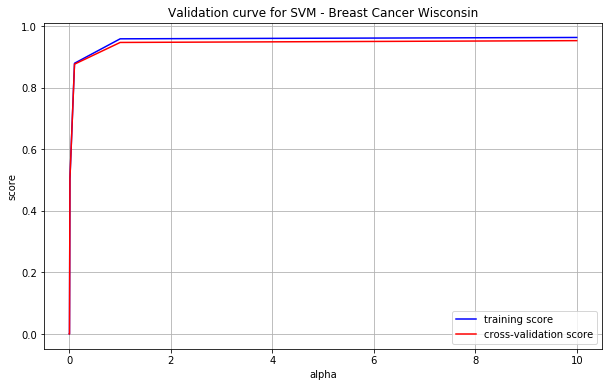

In [45]:
# validation curve
c = np.logspace(-5,1,7)
train_scores, validation_scores = validation_curve(svm,
                                                   X_train, 
                                                   y_train, 
                                                   'C',
                                                   c,
                                                   scoring='recall',
                                                   cv=5)

# plot
plt.figure(figsize=(10,6))
x_cord = c
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(validation_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Validation curve for SVM - Breast Cancer Wisconsin')
plt.xlabel('alpha')
plt.ylabel('score')

In [46]:
# Hyperparameter tuning. 
param_dict = {
    'C': np.logspace(-3,3,7),
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(svm, 
                    param_grid = param_dict, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='recall')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [47]:
print(grid.best_params_)
print(grid.best_score_)
svm = grid.best_estimator_

{'C': 10.0, 'kernel': 'rbf'}
0.9588235294117646


In [48]:
svm

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(svm,
                                                        X_train, 
                                                        y_train, 
                                                        train_sizes=train_sizes, 
                                                        scoring='recall',
                                                        cv=5)

Text(0, 0.5, 'score')

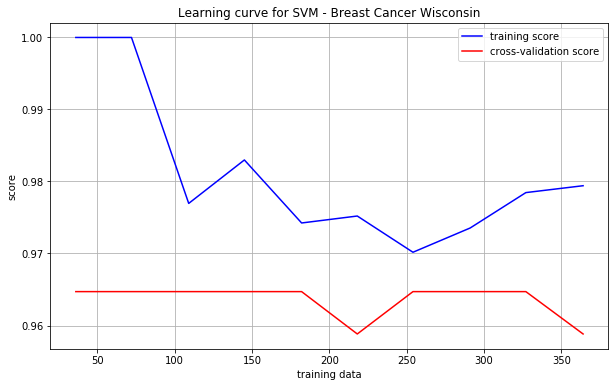

In [50]:
plt.figure(figsize=(10,6))
x_cord = train_sizes
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(test_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Learning curve for SVM - Breast Cancer Wisconsin')
plt.xlabel('training data')
plt.ylabel('score')

In [51]:
model_name = 'SVM'
t_start = time.time()
y_pred_svm = svm.predict(X_test)
t_end = time.time()
pred_time = t_end - t_start

pred_time_dict[model_name] = round(pred_time, 4)
accuracy_dict[model_name] = round(accuracy_score(y_test, y_pred_svm), 4)
recall_dict[model_name] = round(recall_score(y_test, y_pred_svm), 4)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# K-Nearest Neighbors

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Text(0, 0.5, 'score')

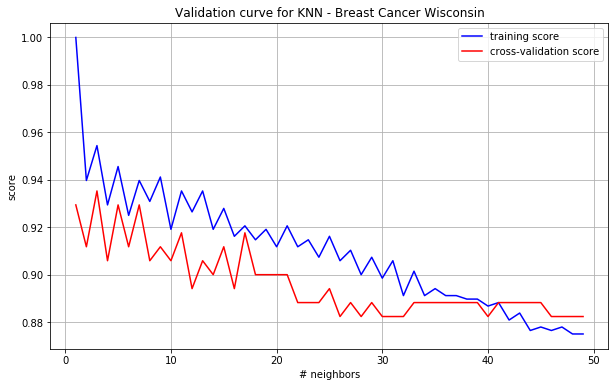

In [54]:
# validation curve
k = list(range(1, 50))
train_scores, validation_scores = validation_curve(knn,
                                                   X_train, 
                                                   y_train, 
                                                   'n_neighbors',
                                                   k,
                                                   scoring='recall',
                                                   cv=5)

# plot
plt.figure(figsize=(10,6))
x_cord = k
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(validation_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Validation curve for KNN - Breast Cancer Wisconsin')
plt.xlabel('# neighbors')
plt.ylabel('score')

In [55]:
# Hyperparameter tuning. 
param_dict = {
    'n_neighbors': range(1, 20),
}

grid = GridSearchCV(knn, 
                    param_grid = param_dict, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='recall')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  95 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='recall', verbose=1)

In [56]:
print(grid.best_params_)
print(grid.best_score_)
knn = grid.best_estimator_

{'n_neighbors': 3}
0.9352941176470588


In [57]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(knn,
                                                        X_train, 
                                                        y_train, 
                                                        train_sizes=train_sizes, 
                                                        scoring='recall',
                                                        cv=5)

Text(0, 0.5, 'score')

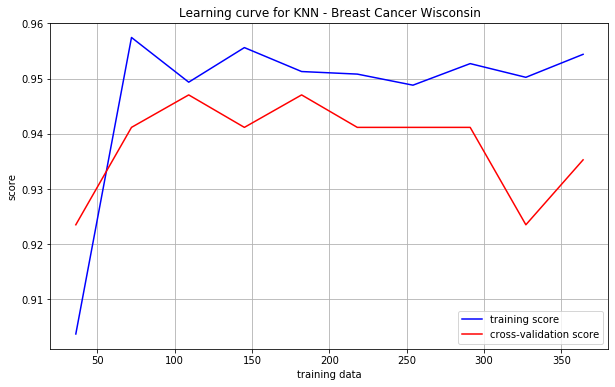

In [58]:
plt.figure(figsize=(10,6))
x_cord = train_sizes
y_cord_train = np.mean(train_scores, axis=1)
y_cord_val = np.mean(test_scores, axis=1)
plt.plot(x_cord, y_cord_train, color='b', label='training score')
plt.plot(x_cord, y_cord_val, color='r', label='cross-validation score')
plt.grid()
plt.legend()
plt.title('Learning curve for KNN - Breast Cancer Wisconsin')
plt.xlabel('training data')
plt.ylabel('score')

In [59]:
model_name = 'KNN'
t_start = time.time()
y_pred_knn = knn.predict(X_test)
t_end = time.time()
pred_time = t_end - t_start

pred_time_dict[model_name] = round(pred_time, 4)
accuracy_dict[model_name] = round(accuracy_score(y_test, y_pred_knn), 4)
recall_dict[model_name] = round(recall_score(y_test, y_pred_knn), 4)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 1.0, 'Training time comparison - Breast Cancer Wisconsin')

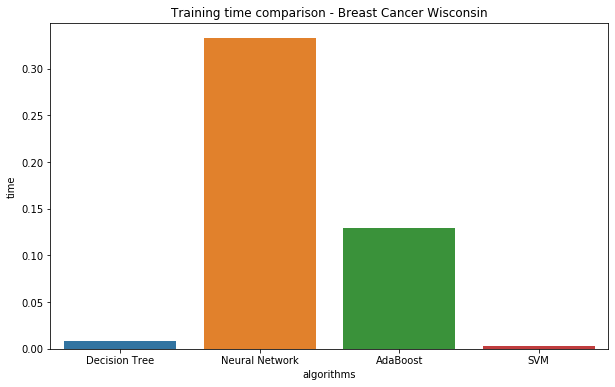

In [60]:
plt.figure(figsize=(10,6))
df_train_time = pd.DataFrame.from_dict(train_time_dict, orient='index').reset_index()
df_train_time.columns = ['algorithms', 'time']
ax = sns.barplot(x='algorithms', y='time', data=df_train_time)
plt.title('Training time comparison - Breast Cancer Wisconsin')

Text(0.5, 1.0, 'Prediction time comparison - Breast Cancer Wisconsin')

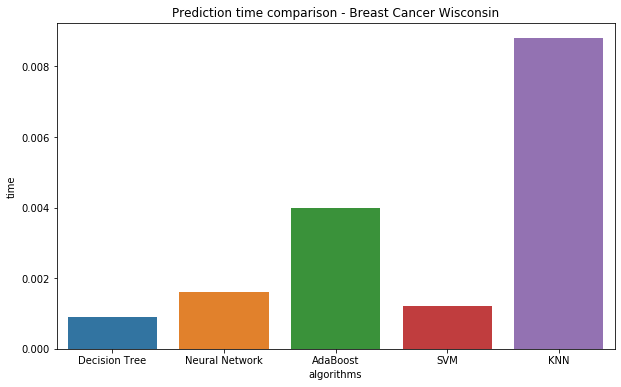

In [61]:

plt.figure(figsize=(10,6))
df_pred_time = pd.DataFrame.from_dict(pred_time_dict, orient='index').reset_index()
df_pred_time.columns = ['algorithms', 'time']
ax = sns.barplot(x='algorithms', y='time', data=df_pred_time)
plt.title('Prediction time comparison - Breast Cancer Wisconsin')

(0.85, 1)

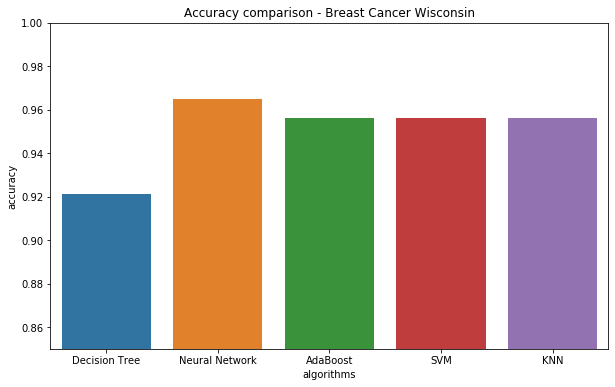

In [62]:

plt.figure(figsize=(10,6))
df_accuracy = pd.DataFrame.from_dict(accuracy_dict, orient='index').reset_index()
df_accuracy.columns = ['algorithms', 'accuracy']
ax = sns.barplot(x='algorithms', y='accuracy', data=df_accuracy)
plt.title('Accuracy comparison - Breast Cancer Wisconsin')
ax.set_ylim(0.85,1)

(0.85, 1)

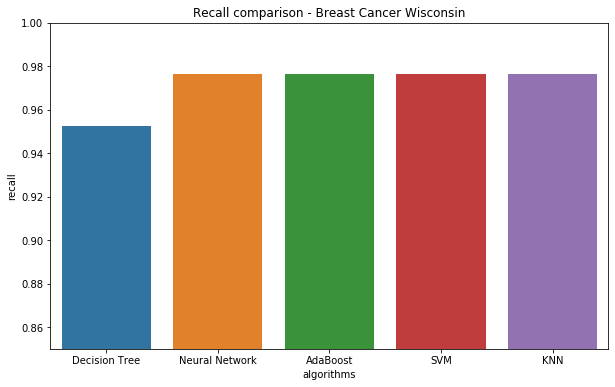

In [63]:

plt.figure(figsize=(10,6))
df_recall = pd.DataFrame.from_dict(recall_dict, orient='index').reset_index()
df_recall.columns = ['algorithms', 'recall']
ax = sns.barplot(x='algorithms', y='recall', data=df_recall)
plt.title('Recall comparison - Breast Cancer Wisconsin')
ax.set_ylim(0.85,1)
